# Task A

### A.1. Train a tree-based ensemble model on the selected dataset

Presented approach will depend on XGBoost model. For training and evaluating I'm using train/test split method with ratio 0.33 on wine_quality dataset. I'm not going to delve into details concerning dataset analysis (I assume, it's been already assessed in the Homework 1). The only change I make in the dataset is renaming column names (from ints "i" to "Feature i"; apparently columns are deprived of proper description) and converting y values to binary. All remaining values are already floats.

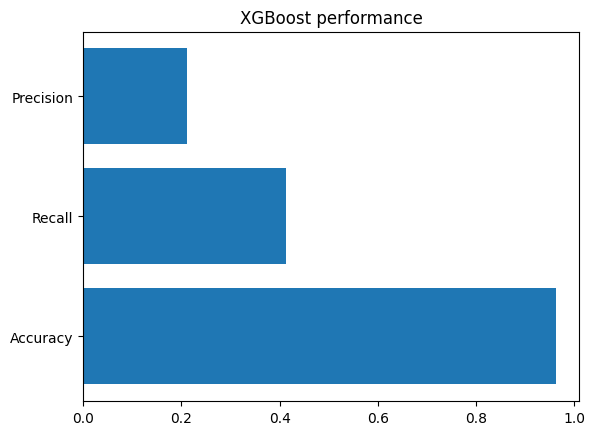

In [224]:
show_performance("XGBoost performance", pred)

These values correspond to ```explainer.model_performance()```. The model performs poorly here because the data is largely imbalanced. in the example paper, authors evaluated their model on the entire dataset (not only test part). This way, enormous number of overrepresented 0's may be predicted, and it would seem that the model is trained much better.

### A.2. Select two observations from the dataset and calculate the model's prediction.

I randomly chose observations 21 and 37 from dataset to perform evaluation. Apart from presenting exact prediction, I'm also displaying detailed coefficients how much the model was prone to choose 0 or 1.

In [225]:
show_selected_predictions()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,TARGET,pred 0,pred 1
4513,6.8,0.40,0.29,2.8,0.044,27.0,97.0,0.99040,3.12,0.42,0,0.999637,0.000363
2379,6.4,0.27,0.19,2.0,0.084,21.0,191.0,0.99516,3.49,0.63,1,0.916261,0.083739


### A.3. For the same observations, calculate the decomposition of predictions, so-called variable attributions, using SHAP

In [226]:
plot_dalex_attributions_for_observations((21,37))

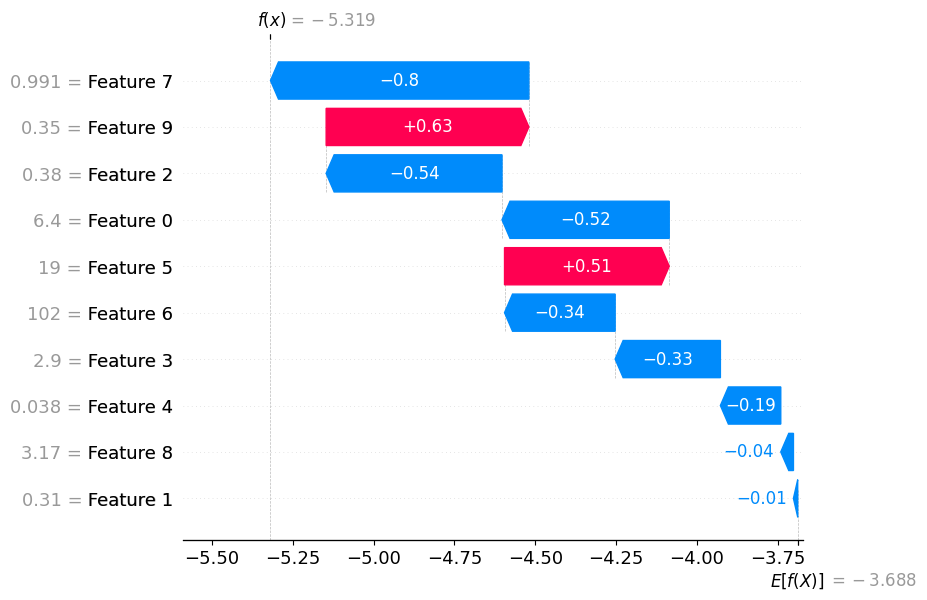

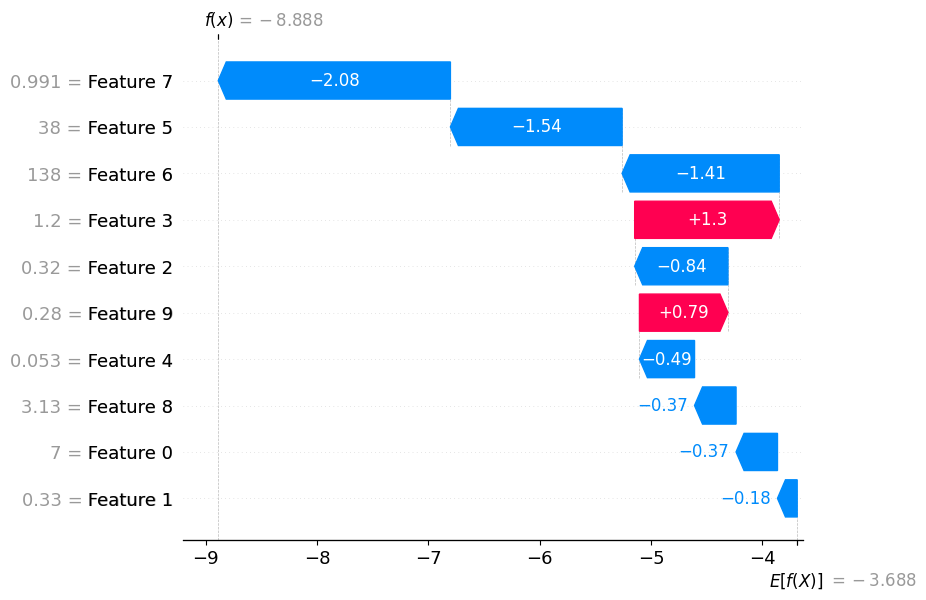

In [227]:
plot_shap_attributions_for_observations((21,37))

### A.4. Find any two observations in the dataset, such that they have different variables of the highest importance

It turns out that observations 21 and 1410 meet that criteria. In the first observation the most important features are 7 and 3, while in the latter observation - 5 and 1.

In [228]:
plot_dalex_attributions_for_observations((21,1410))

### A.5. Select one variable X and find two observations in the dataset such that for one observation, X has a positive attribution, and for the other observation, X has a negative attribution

For example, in the displayed figure above (in section A.4), we can see that Feature 3 has a positive attribution for observation 21 and (slightly) negative for observation 1410.


### A.6. Do the results differ across the two packages selected in point A.3 (how)?

Let's compare two results for observation 37, which I believe is representational enough.

In [230]:
plot_dalex_attributions_for_observations([37])

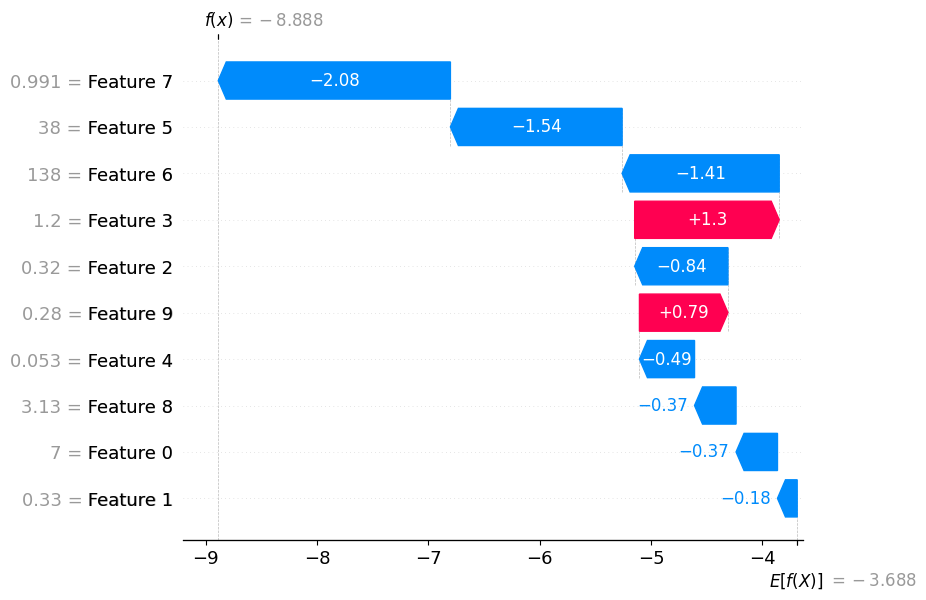

In [231]:
plot_shap_attributions_for_observations([37])

We can clearly see that, while both libraries generally associate the same features with positive/negative contribution, the significance of particular features may differ. Comparing figures above, the influence of Feature 3 may be greater or lower than influence of e.g. Frature 7. The difference may be caused by various methods used to compute shapley attributions. Precise method takes exponential time to compute, hence those libraries (presumably) use methods that estimate those coefficients.

### A.7. Train another model of any class: neural network, linear model, decision tree etc. and find an observation for which SHAP attributions are different between this model and the one trained in point A.1

I chose to train logistic regression model (like in homework 1) and observation 1234. The first figure depicts results for model trained in section A.1, the latter - for linear regression model. What strikes first is huge difference in amount of overall positive and negative contribution to the prediction. Particular features may be insignificant for one model and crucial for another at the same time (e.g. Feature 7 or 0). Features may also correspond to opposite attribution (e.g. 0). The ease with I found such example is probably a result of comparing different models trained on imbalanced data - with overrepresentation of 0's. Also, dissimilar methods and reasoning behind those models may have affect the results.

In [240]:
compare_two_models_for_observation([1234])

# Task B

#### B.1. Calculate Shapley values for player A given the following value function

$
\begin{align}
v() &= 0 \\
v(A) &= 20 \\
v(B) &= 20 \\
v(C) &= 60 \\
v(A,B) &= 60 \\
v(A,C) &= 70 \\
v(B,C) &= 70 \\
v(A,B,C) &= 100 \\
\end{align}
$

We'll be using the formula:
$ \phi_A = \frac{1}{|P|!}\sum_{\pi \in \Pi}v((S_A^{\pi} \cup \{A\}) - v(S_A^{\pi}) $

We have the following permutations $\pi$ and corresponding sets $S_A^{\pi}$:

$
\begin{align}
\pi_1 = \{A,B,C\},&\;\; S_A^{\pi_1} = \emptyset ,&\;\; S_A^{\pi_1}\cup A = \{ A\}\\
\pi_2 = \{A,C,B\},&\;\; S_A^{\pi_2} = \emptyset ,&\;\;S_A^{\pi_2}\cup A = \{ A\}\\
\pi_3 = \{B,A,C\},&\;\; S_A^{\pi_3} = \{B\} ,&\;\;S_A^{\pi_3}\cup A = \{ A,B\}\\
\pi_4 = \{B,C,A\},&\;\; S_A^{\pi_4} = \{B,C\} ,&\;\;S_A^{\pi_4}\cup A = \{A,B,C \}\\
\pi_5 = \{C,A,B\},&\;\; S_A^{\pi_5} = \{C\} ,&\;\;S_A^{\pi_5}\cup A = \{A,C \}\\
\pi_6 = \{C,B,A\},&\;\; S_A^{\pi_6} = \{B,C\} ,&\;\;S_A^{\pi_6}\cup A = \{A,B,C \}\\
\end{align}
$

Hence, the solution is:

$ 
\begin{align}
\phi_A &= \frac{1}{6}\Big(  (v(A) - v()) + (v(A)-v()) + (v(A,B) - v(B)) + (v(A,B,C) - v(B,C)) + (v(A,C)-v(C)) + (v(A,B,C)-v(B,C)) \Big) =\\
&= \frac{1}{6}( 20 - 0 + 20 - 0 + 60 - 20 + 100 - 70 + 70 - 60 + 100 - 70) =\\
&= 25
\end{align}
$

# Appendix

Load libraries and dataset:

In [234]:
import dalex as dx
import xgboost
import matplotlib
import shap
import platform
import sklearn
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# https://github.com/adrianstando/imbalanced-benchmarking-set/blob/main/datasets/wine_quality.csv
dataset = pd.read_csv('wine_quality.csv')
y = dataset["TARGET"].apply(lambda x: 1 if x == 1 else 0)
X_tmp = dataset.drop(axis=1, columns=["TARGET", "Unnamed: 0"])

# rename columns 
X = pd.DataFrame()
X_tmp.head()
for i in range(0,10):
    X[f"Feature {i}"] = X_tmp[str(i)]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 0  4898 non-null   float64
 1   Feature 1  4898 non-null   float64
 2   Feature 2  4898 non-null   float64
 3   Feature 3  4898 non-null   float64
 4   Feature 4  4898 non-null   float64
 5   Feature 5  4898 non-null   float64
 6   Feature 6  4898 non-null   float64
 7   Feature 7  4898 non-null   float64
 8   Feature 8  4898 non-null   float64
 9   Feature 9  4898 non-null   float64
dtypes: float64(10)
memory usage: 382.8 KB


Train XGBoost and linear regression models on selected dataset:

In [235]:
model = xgboost.XGBClassifier(
    n_estimators=200, 
    max_depth=4, 
    use_label_encoder=False, 
    eval_metric="logloss",
    enable_categorical=True,
    tree_method="hist"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
model.fit(X_train, y_train)
pred = model.predict(X_test)

model2 = LogisticRegression(max_iter=10000, class_weight="balanced", random_state=22)
model2.fit(X_train.values, y_train)
pred2 = model.predict(X_test)

def show_performance(title, pred_):
    labels = [
        "Accuracy",
        "Recall",
        "Precision"
    ]
    values = [
        accuracy_score(pred_, y_test),
        recall_score(pred_, y_test),
        precision_score(pred_, y_test)
    ]
    plt.barh(labels, values)
    plt.title(title)
    plt.show()

def _construct_selected_observations():
    selected_observations_indices = [21, 37]
    result_X = X_test.iloc[selected_observations_indices]
    result_y = y_test.iloc[selected_observations_indices]
    pred_y = model.predict_proba(result_X)
    return result_X, result_y, pred_y
    
selected_observations_X, selected_observations_y, selected_observations_pred = _construct_selected_observations()
    
def show_selected_predictions():
    result = deepcopy(selected_observations_X)
    result["TARGET"] = selected_observations_y
    result["pred 0"] = selected_observations_pred[:, 0]
    result["pred 1"] = selected_observations_pred[:, 1]
    return result

explanation with dalex and shap

In [238]:
def pf_xgboost_classifier_categorical(model_, df_):
    return model_.predict_proba(df_)[:, 1] # by the way, it's a value in range [0,1] telling how much the model wants to predict 1

explainer = dx.Explainer(model, X, y, predict_function=pf_xgboost_classifier_categorical, label="GBM")
explainer2 = dx.Explainer(model2, X, y, predict_function=pf_xgboost_classifier_categorical, label="GBM")
shap_explainer = shap.Explainer(model)

def plot_dalex_attributions_for_observations(observation_indices):
    shap_attributions = [explainer.predict_parts(X.iloc[[i]], type="shap", label=f'observation {i}') for i in observation_indices]
    shap_attributions[0].plot(shap_attributions[1::])    

def plot_shap_attributions_for_observations(observation_indices):
    shap_values = shap_explainer(X.iloc[list(observation_indices)])
    for i in range(len(list(observation_indices))):
        shap.plots.waterfall(shap_values[i])
        
def compare_two_models_for_observation(observations):
    shap_attributions = [explainer.predict_parts(X.iloc[[i]], type="shap", label=f'observation {i}') for i in observations]
    shap_attributions2 = [explainer2.predict_parts(X.iloc[[i]], type="shap", label=f'observation {i}') for i in observations]
    shap_attributions[0].plot(shap_attributions[1::])    
    shap_attributions2[0].plot(shap_attributions2[1::])    

Preparation of a new explainer is initiated

  -> data              : 4898 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4898 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : GBM
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7f6f1666dd80> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 6.5e-07, mean = 0.034, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.89, mean = 0.00337, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 4898 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> targ